<a href="https://colab.research.google.com/github/suesu1204/test2/blob/DA/ML_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('mon.csv')

In [5]:
# 데이터의 기술 통계량 계산
descriptive_stats = data.describe()

# 기술 통계량 출력
print(descriptive_stats)

       Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
count   19000.000000      19000.000000      19000.000000    19000.000000   
mean     4188.808526        347.962684       3840.845842        0.097827   
std      3206.123258        289.852424       2991.553668        0.046691   
min        50.000000          6.000000         25.000000        0.029521   
25%      1529.750000        137.000000       1374.750000        0.064862   
50%      3309.000000        281.000000       3007.500000        0.089830   
75%      6378.000000        486.000000       5773.250000        0.119511   
max      9993.000000       4241.000000       9698.000000        0.507246   

       Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
count    19000.000000  19000.000000   19000.000000        19000.000000   
mean         0.902173   1290.778723    2056.481250          223.931263   
std          0.046691    969.399246    1620.844024          274.470064   
min          0.4927

In [6]:
# 특성과 레이블 분리
X = data.drop(columns=['Label'])
y = data['Label']

# 학습 및 테스트 데이터 분할 (70% 학습, 30% 테스트(5700개))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree 분류 모델 초기화 (디폴트 = 지니계수 사용)
dt_classifier = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dt_classifier.predict(X_test)

# 모델 평가 (정확도와 각 클래스별 성능 보고서)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6435087719298246
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.62      0.68      0.65        59
          16       0.62     

In [8]:
import pandas as pd

# 테스트 데이터의 예측 레이블 생성
y_pred = dt_classifier.predict(X_test)

# 실제 레이블과 예측 레이블을 DataFrame으로 정리하여 비교
comparison_df = pd.DataFrame({
    'Actual Label': y_test.values,
    'Predicted Label': y_pred
})

# 예측 결과가 맞았는지 틀렸는지 표시
comparison_df['Correct Prediction'] = comparison_df['Actual Label'] == comparison_df['Predicted Label']

# 결과 출력
print(comparison_df)


      Actual Label  Predicted Label  Correct Prediction
0               37               47               False
1               60               60                True
2               86               86                True
3               89               84               False
4               92               23               False
...            ...              ...                 ...
5695            75               75                True
5696            82               45               False
5697            83               83                True
5698            46               74               False
5699            80               40               False

[5700 rows x 3 columns]


               Feature  Importance
6        Outgoing Mean    0.128731
1     Incoming Packets    0.106078
11   Inter-arrival Std    0.101904
5         Outgoing Std    0.100836
0        Total Packets    0.085669
13   Concentration Std    0.081180
14     Alternative Sum    0.070659
4       Outgoing Ratio    0.048383
12  Concentration Mean    0.047627
3       Incoming Ratio    0.046621
10  Inter-arrival Mean    0.042348
2     Outgoing Packets    0.040510
7   Packets per Second    0.039505
8    First 30 Incoming    0.033969
9    First 30 Outgoing    0.025979


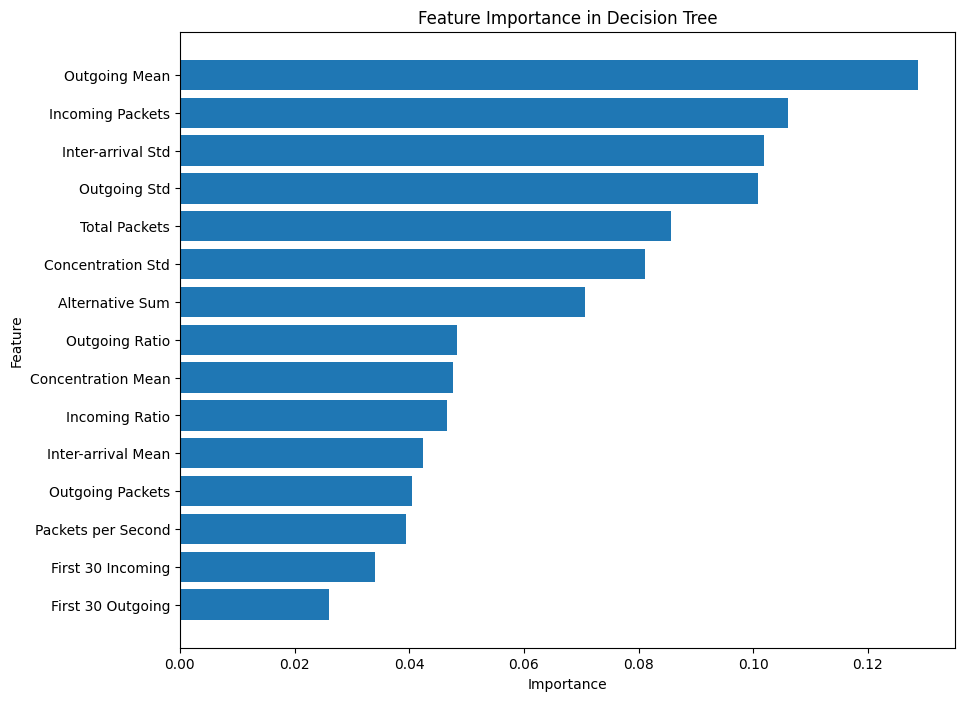

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 추출
feature_importances = dt_classifier.feature_importances_

# 특성 이름과 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 중요도 순서대로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


- 노드 분할 기준으로 엔트로피 사용
    
    accuracy 살짝 높아짐

In [11]:
# 엔트로피를 사용하여 트리 초기화
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

# 모델 학습
dt_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dt_classifier.predict(X_test)

# 모델 평가 (정확도와 각 클래스별 성능 보고서)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6607017543859649
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50        62
           1       0.70      0.56      0.62        59
           2       0.71      0.76      0.74        55
           3       0.57      0.63      0.60        46
           4       0.68      0.85      0.76        53
           5       0.64      0.70      0.67        63
           6       0.81      0.78      0.80        65
           7       0.66      0.55      0.60        64
           8       0.65      0.59      0.62        59
           9       0.44      0.53      0.48        47
          10       0.68      0.62      0.65        66
          11       0.69      0.65      0.67        57
          12       0.90      0.80      0.85        59
          13       0.38      0.48      0.42        54
          14       0.60      0.62      0.61        58
          15       0.67      0.61      0.64        59
          16       0.66     

#성능 개선 - Feature Selection


               Feature  Importance
6        Outgoing Mean    0.151319
11   Inter-arrival Std    0.091396
1     Incoming Packets    0.090530
12  Concentration Mean    0.084061
9    First 30 Outgoing    0.081251
0        Total Packets    0.079526
14     Alternative Sum    0.072048
5         Outgoing Std    0.070430
3       Incoming Ratio    0.063093
13   Concentration Std    0.056176
2     Outgoing Packets    0.047807
8    First 30 Incoming    0.032620
4       Outgoing Ratio    0.028523
10  Inter-arrival Mean    0.028450
7   Packets per Second    0.022772


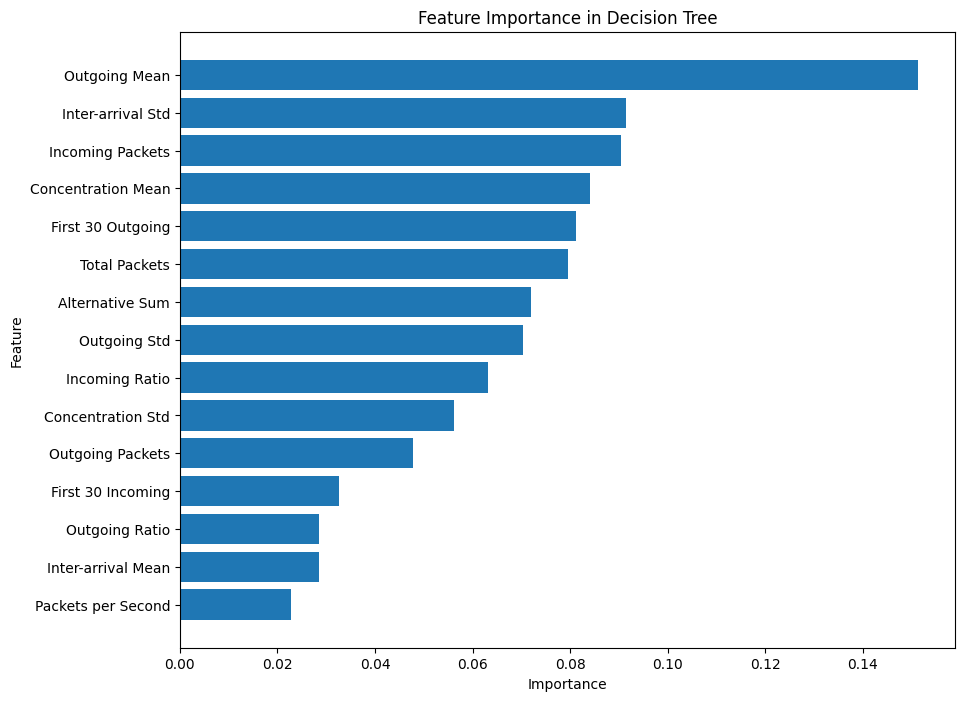

In [12]:
# 특성 중요도 추출
feature_importances = dt_classifier.feature_importances_

# 특성 이름과 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 중요도 순서대로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


In [26]:
# 1. 누적 중요도 90% 기준으로 선택
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()
selected_features_90_percent = importance_df[importance_df['Cumulative Importance'] <= 0.9]['Feature'].values

print("\n누적 중요도 90% 기준으로 선택된 특성들:")
print(selected_features_90_percent)

# 2. 상위 5개 특성 선택
selected_features_top_5 = importance_df['Feature'].head(5).values

print("\n상위 5개 특성 기준으로 선택된 특성들:")
print(selected_features_top_5)


누적 중요도 90% 기준으로 선택된 특성들:
['Outgoing Mean' 'Inter-arrival Std' 'Incoming Packets'
 'Concentration Mean' 'First 30 Outgoing' 'Total Packets'
 'Alternative Sum' 'Outgoing Std' 'Incoming Ratio' 'Concentration Std'
 'Outgoing Packets']

상위 5개 특성 기준으로 선택된 특성들:
['Outgoing Mean' 'Inter-arrival Std' 'Incoming Packets'
 'Concentration Mean' 'First 30 Outgoing']


In [27]:
# 누적 중요도 90% 특성
X_selected_90_percent = X[selected_features_90_percent]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected_90_percent, y, test_size=0.3, random_state=42)

# 새로운 모델 학습
dt_classifier_selected = DecisionTreeClassifier(random_state=42)
dt_classifier_selected.fit(X_train, y_train)

# 예측 및 평가
y_pred_selected = dt_classifier_selected.predict(X_test)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_report_selected = classification_report(y_test, y_pred_selected)

# 결과 출력
print("모델 정확도 (선택된 특성, 누적 90%):", accuracy_selected)
print("\n분류 보고서 (선택된 특성, 누적 90%):\n", classification_report_selected)

모델 정확도 (선택된 특성, 누적 90%): 0.642280701754386

분류 보고서 (선택된 특성, 누적 90%):
               precision    recall  f1-score   support

           0       0.54      0.55      0.54        62
           1       0.71      0.59      0.65        59
           2       0.80      0.75      0.77        55
           3       0.65      0.70      0.67        46
           4       0.67      0.79      0.72        53
           5       0.69      0.83      0.75        63
           6       0.77      0.75      0.76        65
           7       0.71      0.69      0.70        64
           8       0.73      0.64      0.68        59
           9       0.54      0.64      0.58        47
          10       0.70      0.65      0.68        66
          11       0.69      0.60      0.64        57
          12       0.89      0.81      0.85        59
          13       0.40      0.43      0.41        54
          14       0.55      0.62      0.58        58
          15       0.65      0.69      0.67        59
          1

개선 X

In [28]:
# 누적 중요도 90% 특성
X_selected_features_top_5  = X[selected_features_top_5 ]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_top_5, y, test_size=0.3, random_state=42)

# 새로운 모델 학습
dt_classifier_selected = DecisionTreeClassifier(random_state=42)
dt_classifier_selected.fit(X_train, y_train)

# 예측 및 평가
y_pred_selected = dt_classifier_selected.predict(X_test)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_report_selected = classification_report(y_test, y_pred_selected)

# 결과 출력
print("모델 정확도 (선택된 특성, 상위 5개):", accuracy_selected)
print("\n분류 보고서 (선택된 특성, 상위 5개):\n", classification_report_selected)

모델 정확도 (선택된 특성, 상위 5개): 0.5847368421052631

분류 보고서 (선택된 특성, 상위 5개):
               precision    recall  f1-score   support

           0       0.36      0.39      0.38        62
           1       0.50      0.47      0.49        59
           2       0.71      0.82      0.76        55
           3       0.54      0.59      0.56        46
           4       0.58      0.70      0.63        53
           5       0.63      0.78      0.70        63
           6       0.79      0.86      0.82        65
           7       0.54      0.62      0.58        64
           8       0.60      0.56      0.58        59
           9       0.45      0.53      0.49        47
          10       0.83      0.67      0.74        66
          11       0.50      0.60      0.54        57
          12       0.68      0.66      0.67        59
          13       0.33      0.31      0.32        54
          14       0.56      0.52      0.54        58
          15       0.62      0.69      0.66        59
          16

퇴화함..

#성능개선 : 데이터 정규화하기
일부 특성(예: Total Packets, Outgoing Packets, Packets per Second)은 값의 범위가 넓고 비대칭적인 분포를 보입니다.이러한 특성들은 정규화를 통해 데이터의 스케일을 조정하면 모델 성능에 도움이 될 수 있습니다.

Standardscaler 사용해서 졍규화:

  - accuarcy 개선 X

In [18]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('mon.csv')

# 정규화할 특성들만 선택 (레이블은 제외)
features = data.drop(columns=['Label'])
labels = data['Label'].copy()

# Standard 정규화
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
data_standard_scaled = pd.DataFrame(features_standard_scaled, columns=features.columns)
data_standard_scaled['Label'] = labels  # 레이블 추가

print("\nStandard 정규화 결과 (상위 5개 샘플):")
print(data_standard_scaled.head())


Standard 정규화 결과 (상위 5개 샘플):
   Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
0      -0.863311         -0.783049         -0.849362       -0.271499   
1      -1.144967         -0.924504         -1.137514        1.212536   
2      -0.882961         -0.793399         -0.869419       -0.234206   
3      -0.855513         -0.779599         -0.841339       -0.288218   
4      -0.867990         -0.803750         -0.852371       -0.343442   

   Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
0        0.271499     -0.799789      -0.791682           -0.305299   
1       -1.212536     -1.187929      -1.129268           -0.630129   
2        0.234206     -0.843888      -0.783792           -0.370538   
3        0.288218     -0.801407      -0.762797           -0.421542   
4        0.343442     -0.811643      -0.781633           -0.334429   

   First 30 Incoming  First 30 Outgoing  Inter-arrival Mean  \
0           0.566225          -0.566225           -0.2

In [20]:
# 특성과 레이블 분리
X = data_standard_scaled.drop(columns=['Label'])
y = data_standard_scaled['Label']

# 학습 및 테스트 데이터 분할 (70% 학습, 30% 테스트(5700개))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 엔트로피를 사용하여 트리 초기화
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

# 모델 학습
dt_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dt_classifier.predict(X_test)

# 모델 평가 (정확도와 각 클래스별 성능 보고서)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6603508771929825
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.48      0.50        62
           1       0.70      0.56      0.62        59
           2       0.71      0.76      0.74        55
           3       0.57      0.63      0.60        46
           4       0.68      0.85      0.76        53
           5       0.65      0.70      0.67        63
           6       0.81      0.78      0.80        65
           7       0.66      0.55      0.60        64
           8       0.64      0.59      0.61        59
           9       0.44      0.53      0.48        47
          10       0.69      0.62      0.66        66
          11       0.69      0.65      0.67        57
          12       0.90      0.80      0.85        59
          13       0.38      0.48      0.42        54
          14       0.60      0.62      0.61        58
          15       0.67      0.61      0.64        59
          16       0.66     

#성능 개선-하이퍼파라미터 튜닝
- 트리 깊이 제한 (max_depth): 트리의 최대 깊이를 제한하면 과적합을 줄여 성능이 안정화될 수 있습니다.
- 최소 샘플 분할 수 (min_samples_split): 노드를 분할하기 위한 최소 샘플 수를 증가시키면 트리가 덜 복잡해져 과적합이 줄어듭니다.
- 최소 샘플 리프 노드 수 (min_samples_leaf): 리프 노드에 있어야 하는 최소 샘플 수를 설정하면, 리프 노드가 너무 작은 샘플에 맞춰져 과적합되는 것을 방지할 수 있습니다.

In [29]:

from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(columns=['Label'])
y = data['Label']

# 학습 및 테스트 데이터 분할 (원래 전체 데이터 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [5, 10, 15, 20, None],          # 트리의 최대 깊이
    'min_samples_split': [2, 10, 20, 30],        # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 5, 10, 15]           # 리프 노드에 있어야 하는 최소 샘플 수
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 확인
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 성능 평가
accuracy_best = accuracy_score(y_test, y_pred)
classification_report_best = classification_report(y_test, y_pred)

print("최적의 하이퍼파라미터:", best_params)
print("\n모델 정확도 (최적의 하이퍼파라미터 적용):", accuracy_best)
print("\n분류 보고서 (최적의 하이퍼파라미터 적용):\n", classification_report_best)

최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

모델 정확도 (최적의 하이퍼파라미터 적용): 0.6435087719298246

분류 보고서 (최적의 하이퍼파라미터 적용):
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62    

아무것도 안했을때 (66%) 가 제일 높음 ..

##Neural Networks

In [32]:
# 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


정규화 안하면 accuacy 0.03 이렇게 나옴

**1. MLP (Multi-Layer Perceptron)**
MLP는 주로 은닉층이 적은 신경망으로, 비교적 간단한 데이터나 구조에서 효율적이며, 과적합을 방지하면서도 좋은 성능을 낼 수 있습니다.

- 구조적 간결성: MLP는 일반적으로 1~2개의 은닉층을 사용하기 때문에, 데이터가 복잡하지 않거나 패턴이 명확한 경우 적합합니다. 이 데이터셋이 아주 고차원적이거나 복잡한 구조를 가지지 않았다면, 적은 수의 층과 뉴런만으로도 충분한 성능을 낼 수 있습니다.
- 모델 학습의 효율성: MLP는 구조가 단순해 학습 속도가 상대적으로 빠르며, 과적합 방지 기술(예: 정규화)만으로도 안정적인 성능을 낼 수 있습니다. 복잡한 신경망이 필요 없을 때 적은 자원으로 효율적인 성능을 낼 수 있습니다.
- 비교적 쉬운 튜닝: DNN에 비해 하이퍼파라미터 튜닝이 비교적 간단하여, 기본 모델로 빠르게 테스트하기에 좋습니다. 예를 들어 은닉층의 개수나 뉴런 수를 큰 조정 없이도 좋은 성능을 기대할 수 있습니다.

In [33]:
from sklearn.neural_network import MLPClassifier

# MLP 모델 정의 및 학습
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# MLP 모델 예측 및 평가
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP 모델 정확도:", accuracy_mlp)
print("MLP 분류 보고서:\n", classification_report(y_test, y_pred_mlp))


MLP 모델 정확도: 0.714561403508772
MLP 분류 보고서:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        62
           1       0.70      0.73      0.72        59
           2       0.73      0.93      0.82        55
           3       0.54      0.70      0.61        46
           4       0.66      0.79      0.72        53
           5       0.83      0.78      0.80        63
           6       0.73      0.88      0.80        65
           7       0.58      0.52      0.55        64
           8       0.81      0.58      0.67        59
           9       0.58      0.62      0.60        47
          10       0.70      0.67      0.68        66
          11       0.80      0.72      0.76        57
          12       0.85      0.68      0.75        59
          13       0.48      0.50      0.49        54
          14       0.69      0.66      0.67        58
          15       0.58      0.71      0.64        59
          16       0.77      0.73     

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**2. DNN (Deep Neural Network)**
DNN은 MLP보다 깊은 은닉층을 여러 개 사용하며, 더 복잡한 데이터나 패턴을 학습할 수 있는 모델입니다.

-  복잡한 데이터 패턴 학습: DNN은 다수의 은닉층을 사용하여 데이터 내에 존재할 수 있는 비선형적인 패턴을 잘 학습합니다. 예를 들어, 특성 간의 복잡한 상호작용이나 고차원적인 관계가 있을 때 DNN은 MLP보다 더 우수한 성능을 발휘할 수 있습니다.
- 특성 추출력 강화: DNN의 여러 층을 거치면서 데이터에서 **중요한 특징(feature)**들을 점진적으로 추출할 수 있습니다. 이는 데이터의 패턴이 간단하지 않고 복합적일 때, 층이 많아질수록 더 나은 예측 성능을 기대할 수 있다는 점에서 유리합니다.
- 과적합 방지 및 정규화 기법 활용: DNN은 드롭아웃(dropout), 배치 정규화(batch normalization) 등의 다양한 정규화 기법을 적용할 수 있어, 모델이 깊어질수록 발생할 수 있는 과적합 문제를 줄일 수 있습니다.
확장 가능성: DNN은 더 깊은 층과 다양한 뉴런 수로 확장할 수 있어, MLP로 충분한 성능을 얻지 못할 때 모델의 성능을 지속적으로 향상할 수 있는 여지가 많습니다.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

In [41]:
### 2. DNN 모델 학습 ###

# 레이블을 범주형으로 변환 (TensorFlow DNN 모델용)
num_classes = len(y.unique())
y_train_dnn = to_categorical(y_train, num_classes)
y_test_dnn = to_categorical(y_test, num_classes)

# DNN 모델 정의
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # 다중 클래스 분류
])

# DNN 모델 컴파일
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping 콜백 정의 (연속 10 에포크 동안 성능 개선이 없으면 멈춤)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

# DNN 모델 학습
dnn_model.fit(X_train, y_train_dnn, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# DNN 모델 예측 및 평가
_, accuracy_dnn = dnn_model.evaluate(X_test, y_test_dnn)
print("DNN 모델 정확도:", accuracy_dnn)

Epoch 1/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0402 - loss: 4.4131 - val_accuracy: 0.1707 - val_loss: 3.6467
Epoch 2/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1510 - loss: 3.5486 - val_accuracy: 0.2771 - val_loss: 3.0640
Epoch 3/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2066 - loss: 3.2153 - val_accuracy: 0.3297 - val_loss: 2.8266
Epoch 4/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2474 - loss: 3.0467 - val_accuracy: 0.3327 - val_loss: 2.7017
Epoch 5/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2707 - loss: 2.9103 - val_accuracy: 0.3485 - val_loss: 2.6131
Epoch 6/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2831 - loss: 2.8144 - val_accuracy: 0.3838 - val_loss: 2.5144
Epoch 7/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2982 - loss: 2.7558 - val_accuracy: 0.4086 - val_loss: 2.4353
Epoch 8/200
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3161 - loss: 2.6834 - val_accu